# Visualize Results

## Epsiode Summary

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import imageio
import os


testname = "explorer5"

# Load the data
csv_path = f"data/{testname}_episode_summary.csv"  # Replace with your actual CSV path
df = pd.read_csv(csv_path)

# Create a folder to save frames
frames_dir = "frames"
os.makedirs(frames_dir, exist_ok=True)

# Generate plots for each episode
filenames = []
for i in range(1, len(df) + 1):
    sub_df = df.iloc[:i]

    fig, ax = plt.subplots(3, 1, figsize=(6, 8), sharex=True)

    ax[0].plot(sub_df['episode'], sub_df['total_reward'], marker='x', markersize=4)
    ax[0].set_ylabel("Total Reward")
    ax[0].set_title(f"Episode {i}")

    ax[1].plot(sub_df['episode'], sub_df['D50'], marker='x', markersize=4, color='green')
    ax[1].set_ylabel("D50")

    ax[2].plot(sub_df['episode'], sub_df['span'], marker='x', markersize=4, color='red')
    ax[2].set_ylabel("Span")
    ax[2].set_xlabel("Episode")

    plt.tight_layout()
    frame_path = os.path.join(frames_dir, f"frame_{i:03d}.png")
    plt.savefig(frame_path)
    filenames.append(frame_path)
    plt.close()

# Create GIF
# Create figures directory if it doesn't exist
os.makedirs("figures", exist_ok=True)

# Save last frame as PNG
last_frame = filenames[-1]
last_frame_png = f"figures/{testname}_training_final.png"
import shutil
shutil.copy2(last_frame, last_frame_png)

gif_path = f"figures/{testname}_training_progress.gif"
with imageio.get_writer(gif_path, mode='I', duration=0.5) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Optional: clean up frames
for filename in filenames:
    os.remove(filename)

print(f"GIF saved to {gif_path}")
print(f"Final frame saved to {last_frame_png}")


C:\Users\jjper\AppData\Local\Temp\ipykernel_23256\3223061431.py:54: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


GIF saved to figures/explorer5_training_progress.gif
Final frame saved to figures/explorer5_training_final.png


## Top 5 Temperature Profiles

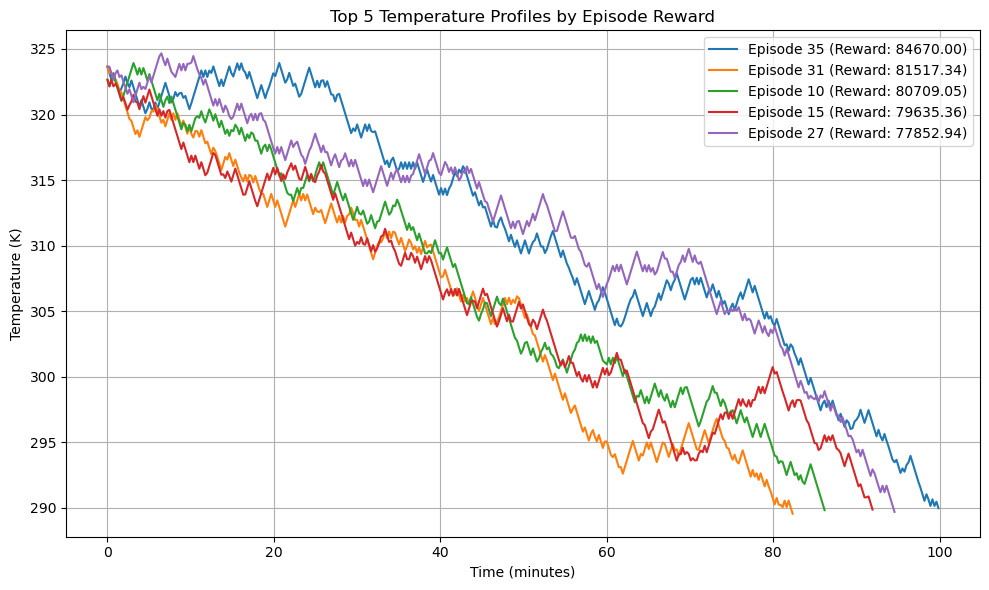

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
csv_path = f"data/{testname}_top_5.csv"  # <-- Replace with your actual file path
df = pd.read_csv(csv_path)

# Plot temperature profiles
plt.figure(figsize=(10, 6))

for ep in df['episode'].unique():
    ep_data = df[df['episode'] == ep]
    plt.plot(ep_data['time'] / 60, ep_data['temperature'], label=f"Episode {ep} (Reward: {ep_data['reward'].iloc[0]:.2f})")

plt.xlabel("Time (minutes)")
plt.ylabel("Temperature (K)")
plt.title("Top 5 Temperature Profiles by Episode Reward")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Create figures directory if it doesn't exist
os.makedirs("figures", exist_ok=True)

# Save the plot
plt.savefig(f"figures/{testname}_top_5_profiles.png")
plt.show()


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import os

# Load data
df = pd.read_csv(f"data/{testname}_top_5.csv")  # Replace with actual filename

# Sort episodes by reward (ascending = worst to best)
episode_rewards = df.groupby("episode")["reward"].first().sort_values()
ordered_episodes = episode_rewards.index.tolist()

# Build a dictionary of profiles
profiles = {ep: df[df["episode"] == ep].reset_index(drop=True) for ep in ordered_episodes}
max_len = max(len(p) for p in profiles.values())

# Animation configuration
frame_skip = 10
steps_per_profile = max_len // frame_skip
total_frames = steps_per_profile * 5  # 5 profiles

# Set up plot
fig, ax = plt.subplots(figsize=(8, 5))
lines = []
for _ in range(5):
    line, = ax.plot([], [], lw=2)
    lines.append(line)

ax.set_xlim(0, df["time"].max())
ax.set_ylim(df["temperature"].min() - 1, df["temperature"].max() + 1)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Temperature (K)")
ax.set_title("Top 5 Temperature Profiles (Worst to Best)")

# Create legend labels
legend_labels = [f"Episode {ep} (Reward: {episode_rewards[ep]:.2f})" for ep in ordered_episodes]

# Animation update function
def update(frame):
    current_profile = frame // steps_per_profile
    current_step = (frame % steps_per_profile) * frame_skip

    for i, ep in enumerate(ordered_episodes):
        profile = profiles[ep]
        t = profile["time"]
        temp = profile["temperature"]

        if i < current_profile:
            lines[i].set_data(t, temp)
            lines[i].set_color("gray")
            lines[i].set_alpha(0.3)
            lines[i].set_label(legend_labels[i])
        elif i == current_profile:
            lines[i].set_data(t[:current_step+1], temp[:current_step+1])
            lines[i].set_color(f"C{i}")
            lines[i].set_alpha(1.0)
            lines[i].set_label(legend_labels[i])
        else:
            lines[i].set_data([], [])
            lines[i].set_alpha(0.0)
            lines[i].set_label("")

    ax.legend(loc='upper right')
    return lines

# Create and save animation
ani = animation.FuncAnimation(fig, update, frames=total_frames, interval=80, blit=True)

os.makedirs("figures", exist_ok=True)
ani.save(f"figures/{testname}_top5_profiles_fast.gif", writer="pillow", fps=15)

# Save final frame
update(total_frames-1)  # Update plot to final frame
plt.savefig(f"figures/{testname}_top5_profiles_final.png")

plt.close()
print(f"GIF saved as figures/{testname}_top5_profiles_fast.gif")
print(f"Final frame saved as figures/{testname}_top5_profiles_final.png")


GIF saved as figures/explorer5_top5_profiles_fast.gif
Final frame saved as figures/explorer5_top5_profiles_final.png
